# Metis Project: MTA Data
## Minimum Viable Product (MVP)

We'll start by downloading all of the data files we need.

For the purpose of the MVP, the highest reported 7-day average of cases according to the nychealth data is that of the 7 days prior to 01/08/2021, so here we'll just download that approximate week from both 2021 and 2020, and the data from the nychealth GitHub.

In [1]:
import urllib.request

url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
#week_nums = [210320, 210313, 210306, 210227, 210220, 210213, 210206, 210130, 210123, 210116, 210109, 210102, 
#             201226, 201219, 201212, ]
week_nums = [210109, 200111]

for week_num in week_nums:
    urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{week_num}.txt",
                               f"data/turnstile_{week_num}.txt")
urllib.request.urlretrieve(f"https://github.com/nychealth/coronavirus-data/blob/master/trends/data-by-day.csv",
                           f"data/data-by-day.csv")

('data/data-by-day.csv', <http.client.HTTPMessage at 0x7f87843a61f0>)

In [50]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#engine = create_engine("sqlite:///mta.db")
#all_data = pd.read_sql('SELECT * FROM mta_data;', engine)
#pd.read_sql('SELECT * FROM data-by-day LIMIT 10;', engine)

In [6]:
mta_data_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210320.txt')
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv')

In [7]:
mta_data_1.columns = mta_data_1.columns.str.strip()
mta_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207054 entries, 0 to 207053
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       207054 non-null  object
 1   UNIT      207054 non-null  object
 2   SCP       207054 non-null  object
 3   STATION   207054 non-null  object
 4   LINENAME  207054 non-null  object
 5   DIVISION  207054 non-null  object
 6   DATE      207054 non-null  object
 7   TIME      207054 non-null  object
 8   DESC      207054 non-null  object
 9   ENTRIES   207054 non-null  int64 
 10  EXITS     207054 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 17.4+ MB


In [8]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   date_of_interest                392 non-null    object
 1   CASE_COUNT                      392 non-null    int64 
 2   PROBABLE_CASE_COUNT             392 non-null    int64 
 3   HOSPITALIZED_COUNT              392 non-null    int64 
 4   DEATH_COUNT                     392 non-null    int64 
 5   PROBABLE_DEATH_COUNT            392 non-null    int64 
 6   CASE_COUNT_7DAY_AVG             392 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG         392 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG             392 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG            392 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG        392 non-null    int64 
 11  BX_CASE_COUNT                   392 non-null    int64 
 12  BX_PROBABLE_CASE_COUNT          392 non-null    in

That's a lot of data, so for now we'll drop all of the columns that specify borough data.

In [9]:
covid_data.drop(covid_data.columns[range(11, 62)], axis = 1, inplace = True)

In [10]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_interest          392 non-null    object
 1   CASE_COUNT                392 non-null    int64 
 2   PROBABLE_CASE_COUNT       392 non-null    int64 
 3   HOSPITALIZED_COUNT        392 non-null    int64 
 4   DEATH_COUNT               392 non-null    int64 
 5   PROBABLE_DEATH_COUNT      392 non-null    int64 
 6   CASE_COUNT_7DAY_AVG       392 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG   392 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG       392 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG      392 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG  392 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 33.8+ KB


In [11]:
covid_data.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG
0,02/29/2020,1,0,1,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,0


In [23]:
mta_data_1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,03:00:00,REGULAR,7543925,2573549
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,07:00:00,REGULAR,7543931,2573559
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,11:00:00,REGULAR,7543970,2573622
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,15:00:00,REGULAR,7544072,2573700
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,19:00:00,REGULAR,7544219,2573729


In [51]:
mta_data_1["DATETIME"] = pd.to_datetime(mta_data_1.DATE + " " + mta_data_1.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [52]:
mta_data_1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,03:00:00,REGULAR,7543925,2573549,2021-03-13 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,07:00:00,REGULAR,7543931,2573559,2021-03-13 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,11:00:00,REGULAR,7543970,2573622,2021-03-13 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,15:00:00,REGULAR,7544072,2573700,2021-03-13 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,19:00:00,REGULAR,7544219,2573729,2021-03-13 19:00:00


A cursory look at the data indicates what information we're working with and how it's formatted, but I'd like to take a look at the actual numbers to make sure they make sense.

In [12]:
covid_data.CASE_COUNT.describe()

count     387.000000
mean     1759.418605
std      1682.616697
min         0.000000
25%       355.500000
50%      1026.000000
75%      3058.000000
max      6561.000000
Name: CASE_COUNT, dtype: float64

In [15]:
covid_data.sort_values('CASE_COUNT_7DAY_AVG', ascending = False).head(10)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG
39,04/08/2020,5579,199,1566,568,199,5291,5481,1591,546,737
38,04/07/2020,6042,215,1579,598,215,5272,5448,1616,529,705
314,01/08/2021,5294,1095,351,61,3,5241,6438,349,56,59
40,04/09/2020,5071,192,1350,559,192,5194,5388,1544,555,749
37,04/06/2020,6354,224,1742,575,224,5188,5346,1648,499,656
315,01/09/2021,3690,910,322,73,3,5170,6344,349,58,61
36,04/05/2020,3781,173,1404,578,173,5156,5294,1664,463,601
316,01/10/2021,3196,989,305,52,4,5134,6308,350,61,64
35,04/04/2020,3864,188,1457,510,188,5125,5247,1678,422,544
34,04/03/2020,5668,166,1712,498,166,5070,5173,1669,388,490


How will we calculate the total daily traffic of a station? Get the MAX and MIN of both ENTRIES and EXITS for each day (grouped by station), calculate the difference of each, and add them together. This will give us a single number that can be used as a general measure of the flow of traffic for each station each day. We can then add the numbers for every station together to get the total amount of traffic for the entire MTA each day.

In [56]:
grouped_max_entries = mta_data_1.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.max()
grouped_max_entries

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          03/13/2021    7544310
                                      03/14/2021    7544559
                                      03/15/2021    7545056
                                      03/16/2021    7545597
                                      03/17/2021    7546147
                                                     ...   
TRAM2  R469  00-05-01  RIT-ROOSEVELT  03/15/2021       5554
                                      03/16/2021       5554
                                      03/17/2021       5554
                                      03/18/2021       5554
                                      03/19/2021       5554
Name: ENTRIES, Length: 34973, dtype: int64

In [57]:
grouped_min_entries = mta_data_1.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.min()
grouped_min_entries

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          03/13/2021    7543925
                                      03/14/2021    7544321
                                      03/15/2021    7544591
                                      03/16/2021    7545133
                                      03/17/2021    7545678
                                                     ...   
TRAM2  R469  00-05-01  RIT-ROOSEVELT  03/15/2021       5554
                                      03/16/2021       5554
                                      03/17/2021       5554
                                      03/18/2021       5554
                                      03/19/2021       5554
Name: ENTRIES, Length: 34973, dtype: int64

In [73]:
#mta_data_1["NEW_ENTRIES"] = grouped_max_entries - grouped_min_entries
new_entries = grouped_max_entries - grouped_min_entries
new_entries

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          03/13/2021    385
                                      03/14/2021    238
                                      03/15/2021    465
                                      03/16/2021    464
                                      03/17/2021    469
                                                   ... 
TRAM2  R469  00-05-01  RIT-ROOSEVELT  03/15/2021      0
                                      03/16/2021      0
                                      03/17/2021      0
                                      03/18/2021      0
                                      03/19/2021      0
Name: ENTRIES, Length: 34973, dtype: int64

In [28]:
new_entries.describe()

count    3.497300e+04
mean     1.959884e+04
std      2.897856e+06
min      0.000000e+00
25%      5.400000e+01
50%      1.900000e+02
75%      3.950000e+02
max      5.370059e+08
Name: ENTRIES, dtype: float64

Issue: some of these numbers ( As many as 500,000,000 entries at one station in a single day?) are far too high for a single day's traffic. I'll analyze this by making a histrogram of calculated new entries.

In [66]:
#mta_data_1["NEW_ENTRIES"] = new_entries
#test.head()
#mta_data_1["NEW_ENTRIES"] = new_entries.values()

#mta_data_1(head)

(array([3.4971e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 5.37005898e+07, 1.07401180e+08, 1.61101769e+08,
        2.14802359e+08, 2.68502949e+08, 3.22203539e+08, 3.75904129e+08,
        4.29604718e+08, 4.83305308e+08, 5.37005898e+08]),
 <BarContainer object of 10 artists>)

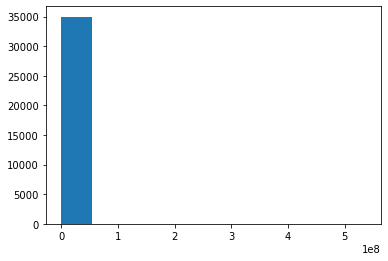

In [71]:
#plt.figure(figsize = (12, 12)
plt.hist(new_entries)

<AxesSubplot:xlabel='C/A,UNIT,SCP,STATION,DATE'>

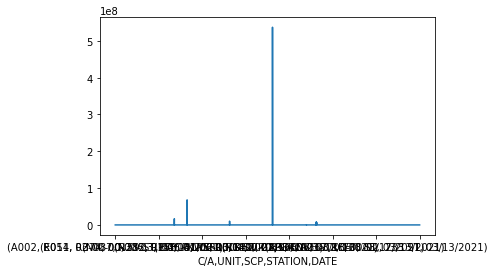

In [68]:
new_entries.plot()

In [82]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_interest          392 non-null    object
 1   CASE_COUNT                392 non-null    int64 
 2   PROBABLE_CASE_COUNT       392 non-null    int64 
 3   HOSPITALIZED_COUNT        392 non-null    int64 
 4   DEATH_COUNT               392 non-null    int64 
 5   PROBABLE_DEATH_COUNT      392 non-null    int64 
 6   CASE_COUNT_7DAY_AVG       392 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG   392 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG       392 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG      392 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG  392 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 33.8+ KB


In [86]:
covid_data["DATE"] = pd.to_datetime(covid_data["date_of_interest"])
covid_data

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,DATE
0,02/29/2020,1,0,1,0,0,0,0,0,0,0,2020-02-29
1,03/01/2020,0,0,1,0,0,0,0,0,0,0,2020-03-01
2,03/02/2020,0,0,2,0,0,0,0,0,0,0,2020-03-02
3,03/03/2020,1,0,7,0,0,0,0,0,0,0,2020-03-03
4,03/04/2020,5,0,2,0,0,0,0,0,0,0,2020-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...
387,03/22/2021,3646,1392,283,47,7,2797,3891,242,51,54,2021-03-22
388,03/23/2021,2947,1214,224,46,7,2776,3892,242,48,52,2021-03-23
389,03/24/2021,3087,1228,239,37,9,2777,3900,241,47,52,2021-03-24
390,03/25/2021,3104,1338,213,51,14,2815,3980,233,45,52,2021-03-25


In [88]:
mask = (covid_data["DATE"] >= "2021-03-13") & (covid_data["DATE"] <= "2021-03-19")
covid_excerpt = covid_data[mask]
covid_excerpt

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,DATE
378,03/13/2021,2126,854,207,64,3,2854,3867,269,65,68,2021-03-13
379,03/14/2021,1870,858,236,40,3,2856,3867,266,63,65,2021-03-14
380,03/15/2021,3313,1142,265,47,2,2850,3855,263,59,62,2021-03-15
381,03/16/2021,3092,1064,227,64,2,2823,3823,255,58,61,2021-03-16
382,03/17/2021,3079,1177,248,47,3,2812,3820,251,56,59,2021-03-17
383,03/18/2021,2840,1042,266,60,2,2782,3790,247,57,59,2021-03-18
384,03/19/2021,2925,1113,213,43,2,2749,3785,237,52,55,2021-03-19


Text(0.5, 0, 'Date')

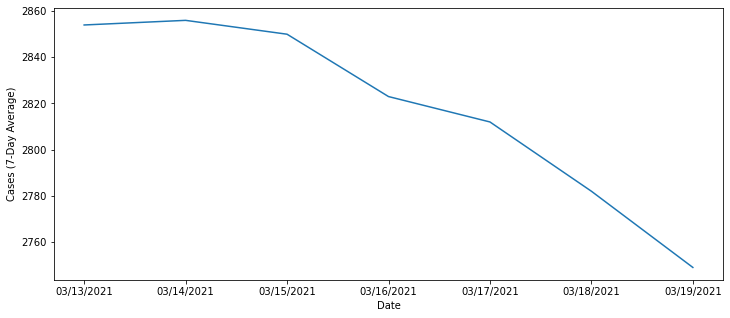

In [92]:
plt.figure(figsize=(12,5))
plt.plot(covid_excerpt["date_of_interest"], covid_excerpt["CASE_COUNT_7DAY_AVG"])
plt.ylabel("Cases (7-Day Average)")
plt.xlabel("Date")

In [100]:
turnstiles_daily = (mta_data_1
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False))
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,03:00:00,REGULAR,7543925,2573549,2021-03-13 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,07:00:00,REGULAR,7543931,2573559,2021-03-13 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,11:00:00,REGULAR,7543970,2573622,2021-03-13 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,15:00:00,REGULAR,7544072,2573700,2021-03-13 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/13/2021,19:00:00,REGULAR,7544219,2573729,2021-03-13 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
207048,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,01:00:00,REGULAR,5554,544,2021-03-19 01:00:00
207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,05:00:00,REGULAR,5554,544,2021-03-19 05:00:00
207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,09:00:00,REGULAR,5554,544,2021-03-19 09:00:00
207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,13:00:00,REGULAR,5554,544,2021-03-19 13:00:00


In [93]:
def count_entries(row, limit):
    x =
    
    
    
    return x

turnstiles_daily["NEW_ENTRIES"] = mta_data_1.apply(count_entries, axis = 1, limit = 100000
turnstiles_daily

TypeError: DataFrame constructor called with incompatible data and dtype: 'numpy.ndarray' object is not callable